Importing the necessary library and the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn_pandas import CategoricalImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
import math

# Importing the dataset
dataset = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

Dropping unnecessary features

In [ ]:
dataset.drop(columns = ['Year_of_Release', 'Developer', 'Publisher', 'Platform'], inplace = True)
# View columns with missing values
print(dataset.isna().sum())

Name               2
Genre              2
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    8582
Critic_Count    8582
User_Score      9129
User_Count      9129
Rating          6769
dtype: int64


Creating Train and Test sets

In [ ]:
# Deleting the global sales as it won't be needed for the train and test sets
X = dataset.iloc[:, :].values
X = np.delete(X, 6, 1)

y = dataset.iloc[:, 6:7].values


# Splitting the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Separating the name of the games in different sets
games_in_training_set = X_train[:, 0]
games_in_test_set = X_test[:, 0]

X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

Fill Changing missing values with substituted values

In [ ]:
imputer = SimpleImputer(strategy = 'mean')
X_train[:, [5 ,6, 7, 8]] = imputer.fit_transform(X_train[:, [5, 6, 7, 8]])
X_test[:, [5 ,6, 7, 8]] = imputer.transform(X_test[:, [5, 6, 7, 8]])

categorical_imputer = CategoricalImputer(strategy = 'constant', fill_value = 'NA')
X_train[:, [0, 9]] = categorical_imputer.fit_transform(X_train[:, [0, 9]])
X_test[:, [0, 9]] = categorical_imputer.transform(X_test[:, [0, 9]])

Encoding the values into numeric forms

In [ ]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0, 9])], remainder = 'passthrough') 
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

Creating the model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

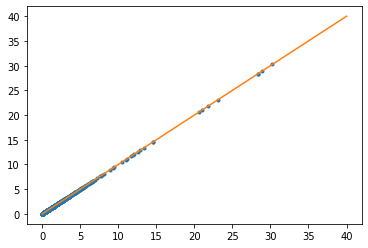

,Name,Predicted_Global_Sales,Actual_Global_Sales
0,R-Type Final,0.180317,0.19
1,The Terminator: Dawn of Fate,0.4106,0.41
2,Dead to Rights: Retribution,0.290353,0.28
3,Skylanders SWAP Force,2.150261,2.15
4,DiRT,1.050122,1.05
...,...,...,...
5011,Dynasty Warriors,0.500498,0.51
5012,Transformers: Dark of the Moon,0.170439,0.17
5013,Brunswick Pro Bowling,0.210145,0.21
5014,Valentino Rossi: The Game,0.070324,0.08


In [ ]:
y_pred = model.predict(X_test)
plt.plot(y_test, y_pred, '.')
x = np.linspace(0, 40, 100)
y = x
plt.plot(x, y)
plt.show()


# Visualising actual and predicted sales
games_in_test_set = games_in_test_set.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)
predictions = np.concatenate([games_in_test_set, y_pred, y_test], axis = 1)
predictions = pd.DataFrame(predictions, columns = ['Name', 'Predicted_Global_Sales', 'Actual_Global_Sales'])
predictions

In [ ]:
r2_score = r2_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"r2 score of the model : {r2_score}")
print(f"Root Mean Squared Error of the model : {rmse}")

r2 score of the model : 0.9999871024721011
Root Mean Squared Error of the model : 0.005155999238873585


In [ ]:
predictions.to_csv('predicted_sales.csv', index=False)